### Points to Address (Accessing)
1. Data data has error in some places, day and month has to be rearranged
   data1 and data6 has corrupt or erreneous data in datetime table.
   
2. Database is not exactly sorted w.r.t. to date
   Data1, Data6 and data6 has unsorted rows in some places
   
3. Fuel Voltage data has increasing trends in 5 out of 6 datafiles. But in actual, the trend must be decreasing wth time

4. Erreneous cumulative distance trends in file1, file4 and file6
5. There are outliers in all of the datsets. That has to be removed
6. Datetime data type is set as object.
7. Voltage data is in Hex form. Need to be corrected.


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm, naive_bayes
import statsmodels 
%matplotlib inline

#### Data Gathering

In [25]:
df1 = pd.read_csv(r"data\008527945276.csv")
df2 = pd.read_csv(r"data\008527946327.csv")
df3 = pd.read_csv(r"data\008527948065.csv")
df4 = pd.read_csv(r"data\008527949981.csv")
df5 = pd.read_csv(r"data\008826369174.csv")
df6 = pd.read_csv(r"data\009821702910.csv")

In [12]:
(df1.head())

,id,lat,long,created_at,updated_at,device_id,speed,orientation,distance,received_at,io_state,availability,raw_data,new_cordinate_id
0,2.025505e+09,28.710563,77.179337,13-01-18 7:24,NaN,8527945276,0.9,0.0,256,13-01-18 7:24,1000007,A,NaN,NaN
1,2.025505e+09,28.710615,77.179970,13-01-18 7:10,NaN,8527945276,1.1,0.0,6,13-01-18 7:10,1000007,A,NaN,NaN
2,2.025505e+09,28.710595,77.180145,13-01-18 7:11,NaN,8527945276,1.8,87.4,21,13-01-18 7:10,1000007,A,NaN,NaN
3,2.025505e+09,28.710597,77.180138,13-01-18 7:11,NaN,8527945276,1.1,0.0,26,13-01-18 7:11,1000007,A,NaN,NaN
4,2.025505e+09,28.710588,77.180013,13-01-18 7:12,NaN,8527945276,0.9,0.0,50,13-01-18 7:12,1000007,A,NaN,NaN


In [13]:
df2.head()

,id,lat,long,created_at,updated_at,device_id,speed,orientation,distance,received_at,io_state,availability,raw_data,new_cordinate_id
0,2.081026e+09,28.710558,77.179252,2018-01-18 14:52:23,NaN,8527946327,0.3,0.0,7,2018-01-18 14:52:06,01000003,A,NaN,NaN
1,2.081026e+09,28.710580,77.179328,2018-01-18 14:52:40,NaN,8527946327,0.5,0.0,7,2018-01-18 14:52:36,01000003,A,NaN,NaN
2,2.081026e+09,28.710508,77.179273,2018-01-18 14:53:27,NaN,8527946327,0.1,0.0,7,2018-01-18 14:53:25,01000003,A,NaN,NaN
3,2.081026e+09,28.710487,77.179323,2018-01-18 14:54:26,NaN,8527946327,0.1,0.0,7,2018-01-18 14:54:25,01000003,A,NaN,NaN
4,2.081026e+09,28.710513,77.179360,2018-01-18 14:55:28,NaN,8527946327,0.1,0.0,7,2018-01-18 14:55:25,01000003,A,NaN,NaN


### Data Wrangling - Part 1
#### Extracting relevant hex data to convert to int.

In [26]:
df1.io_state[2][-3:]

'007'

In [27]:
a = df1.io_state[2][-3:]
int(a,16)

7

In [28]:
df1['FuelVoltage']= df1.io_state.apply(lambda x: int(x[-3:],16))
df2['FuelVoltage']= df2.io_state.apply(lambda x: int(x[-3:],16))
df3['FuelVoltage']= df3.io_state.apply(lambda x: int(x[-3:],16))
df4['FuelVoltage']= df4.io_state.apply(lambda x: int(x[-3:],16))
df5['FuelVoltage']= df5.io_state.apply(lambda x: int(x[-3:],16))
df6['FuelVoltage']= df6.io_state.apply(lambda x: int(x[-3:],16))

In [29]:
df1.FuelVoltage.describe()

count    67848.000000
mean        99.766036
std        167.468089
min          0.000000
25%          7.000000
50%          7.000000
75%        102.000000
max        599.000000
Name: FuelVoltage, dtype: float64

In [30]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67848 entries, 0 to 67847
Data columns (total 15 columns):
id                  14740 non-null float64
lat                 67848 non-null float64
long                67848 non-null float64
created_at          67848 non-null object
updated_at          0 non-null float64
device_id           67848 non-null int64
speed               67848 non-null float64
orientation         67848 non-null float64
distance            67848 non-null int64
received_at         67848 non-null object
io_state            67848 non-null object
availability        67848 non-null object
raw_data            0 non-null float64
new_cordinate_id    53108 non-null float64
FuelVoltage         67848 non-null int64
dtypes: float64(8), int64(3), object(4)
memory usage: 7.8+ MB


### Data Wrangling - Part 2
#### Extracting relevant columns and storing to dataframe and csv files

In [31]:
mydf1 = pd.DataFrame()
mydf2 = pd.DataFrame()
mydf3 = pd.DataFrame()
mydf4 = pd.DataFrame()
mydf5 = pd.DataFrame()
mydf6 = pd.DataFrame()

mydf1[['datetime','speed','distance','fuelVoltage']] = df1[['received_at','speed','distance','FuelVoltage']]
mydf2[['datetime','speed','distance','fuelVoltage']] = df2[['received_at','speed','distance','FuelVoltage']]
mydf3[['datetime','speed','distance','fuelVoltage']] = df3[['received_at','speed','distance','FuelVoltage']]
mydf4[['datetime','speed','distance','fuelVoltage']] = df4[['received_at','speed','distance','FuelVoltage']]
mydf5[['datetime','speed','distance','fuelVoltage']] = df5[['received_at','speed','distance','FuelVoltage']]
mydf6[['datetime','speed','distance','fuelVoltage']] = df6[['received_at','speed','distance','FuelVoltage']]

In [32]:
mydf2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52516 entries, 0 to 52515
Data columns (total 4 columns):
datetime       52516 non-null object
speed          52516 non-null float64
distance       52516 non-null int64
fuelVoltage    52516 non-null int64
dtypes: float64(1), int64(2), object(1)
memory usage: 1.6+ MB


In [21]:
mydf2.datetime = pd.to_datetime(mydf2.datetime)
mydf2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52516 entries, 0 to 52515
Data columns (total 4 columns):
datetime       52516 non-null datetime64[ns]
speed          52516 non-null float64
distance       52516 non-null int64
fuelVoltage    52516 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 1.6 MB


In [33]:
mydf1.to_csv("G:\Manjeet\Intern_Loconav\csvs\data1.csv")
mydf2.to_csv("G:\Manjeet\Intern_Loconav\csvs\data2.csv")
mydf3.to_csv("G:\Manjeet\Intern_Loconav\csvs\data3.csv")
mydf4.to_csv("G:\Manjeet\Intern_Loconav\csvs\data4.csv")
mydf5.to_csv("G:\Manjeet\Intern_Loconav\csvs\data5.csv")
mydf6.to_csv("G:\Manjeet\Intern_Loconav\csvs\data6.csv")

#### Example Assesement

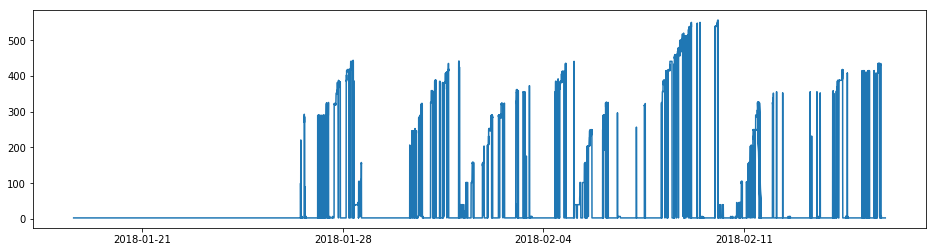

In [23]:
plt.rcParams['figure.figsize'] = [16,4]
plt.plot(mydf2.datetime,mydf2.fuelVoltage);

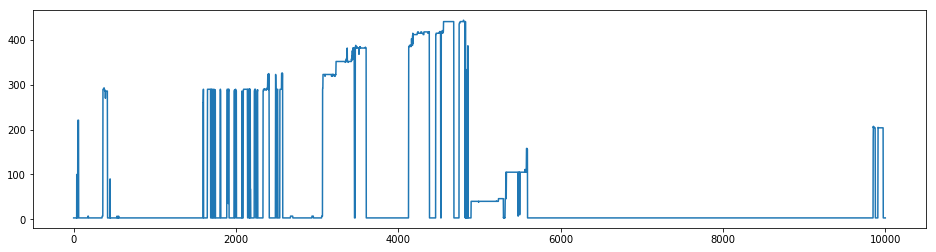

In [24]:
plt.plot(mydf2.index[:10000],mydf2.fuelVoltage[:10000]);